In [1]:
import importlib
import sys

import sklearn.linear_model

sys.path.insert(0, './..')
from utils import data_manage_utils, train_utils
importlib.reload(data_manage_utils)
importlib.reload(train_utils)

<module 'utils.train_utils' from 'C:\\Users\\chrig\\OneDrive - Johannes Kepler Universität Linz (1)\\Masterarbeit\\PythonWorkspace\\training\\./..\\utils\\train_utils.py'>

In [2]:
import pandas as pd

data = pd.read_pickle("processed_files/01a_preprocessing.pkl")
X_train = pd.read_pickle("processed_files/NEW/X_train_df.pkl")
cols = list(X_train.columns) + list(data.columns[-1:])
data = data[cols]
X = data[cols[:-1]]
y = data[cols[-1:]]
print(f"Shape of y: {y.shape}")
X

Shape of y: (348872, 1)


,ARR_MIN_OF_DAY_COS,WINGLETS(YN),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),MTOW(KG),TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),SEA_LEVEL_PRESSURE(MILLIBAR),...,EVENT_SN,EVENT_TS,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN
5612585,0.446798,1,410.0,0,78000.133912,5.611111,95.84,140.0,11.112,1018.8,...,0,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.894635
5614966,0.305184,0,448.0,2,79015.726400,5.611111,95.84,140.0,11.112,1018.8,...,0,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.952293
5616651,0.116537,0,421.0,2,79015.726400,6.111111,96.24,170.0,18.520,1017.8,...,0,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.993186
5616326,0.100522,0,450.0,2,122469.840000,6.111111,96.24,170.0,18.520,1017.8,...,0,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.994935
5613460,0.040266,0,458.0,2,79015.726400,6.111111,96.24,170.0,18.520,1017.8,...,0,0,1.0,1.0,1.0,1.0,1.0,-0.781831,0.62349,0.999189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289608,0.838671,1,122.0,8,78000.133912,6.722222,57.37,320.0,12.964,1019.5,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.544639
11283412,0.855781,0,290.0,8,79015.726400,6.722222,57.37,320.0,12.964,1019.5,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.517338
11284363,0.855781,0,170.0,8,79015.726400,6.722222,57.37,320.0,12.964,1019.5,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.517338
11286614,0.864005,1,179.0,11,78000.133912,6.722222,57.37,320.0,12.964,1019.5,...,0,0,0.0,0.0,0.0,0.0,0.0,-0.781831,0.62349,-0.503484


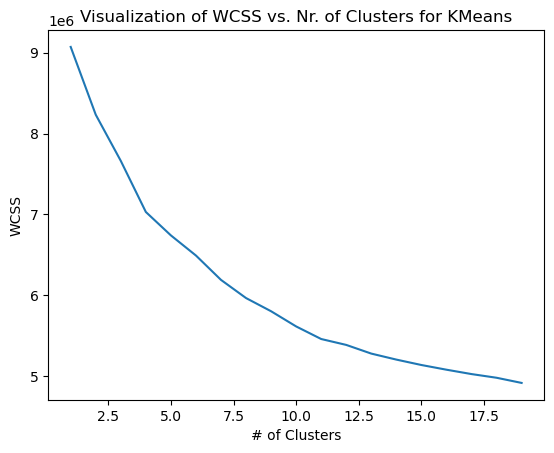

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,20), wcss)
plt.title("Visualization of WCSS vs. Nr. of Clusters for KMeans")
plt.xlabel("# of Clusters")
plt.ylabel("WCSS")
plt.show()

In [4]:
kmeans = KMeans(n_clusters=11, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)
X_df = pd.DataFrame(X_scaled, columns=X.columns)
X_df["cluster"] = labels
X_df["y"] = list(y["ARR_DELAY_MINS"])
X_df

,ARR_MIN_OF_DAY_COS,WINGLETS(YN),CRS_ELAPSED_TIME(MINS),NR_PREV_ARR_FLIGHTS(1HR),MTOW(KG),TEMP(C),REL_HUMIDITY(PERCENT),WIND_DRCT(DEG),WIND_SPEED(KMH),SEA_LEVEL_PRESSURE(MILLIBAR),...,08L/26R,08R/26L,09L/27R,09R/27L,10/28,ARR_DAY_SIN,ARR_DAY_COS,ARR_MIN_OF_DAY_SIN,cluster,y
0,1.817080,1.644240,2.563968,-3.236830,-0.518313,-1.656240,1.346653,-0.574715,-0.293619,0.147960,...,-0.374948,-0.184691,-0.29643,-0.279751,-0.977041,-1.183642,0.867422,1.454756,3,-10
1,1.528469,-0.608184,2.954983,-3.127763,-0.503699,-1.656240,1.346653,-0.574715,-0.293619,0.147960,...,-0.374948,-0.184691,-0.29643,-0.279751,-0.977041,-1.183642,0.867422,1.533713,3,-8
2,1.144005,-0.608184,2.677156,-3.127763,-0.503699,-1.594207,1.365795,-0.278361,0.797833,-0.021881,...,-0.374948,-0.184691,-0.29643,-0.279751,-0.977041,-1.183642,0.867422,1.589712,3,-20
3,1.111366,-0.608184,2.975562,-3.127763,0.121606,-1.594207,1.365795,-0.278361,0.797833,-0.021881,...,-0.374948,-0.184691,-0.29643,-0.279751,-0.977041,-1.183642,0.867422,1.592106,3,-7
4,0.988564,-0.608184,3.057881,-3.127763,-0.503699,-1.594207,1.365795,-0.278361,0.797833,-0.021881,...,-0.374948,-0.184691,-0.29643,-0.279751,-0.977041,-1.183642,0.867422,1.597932,3,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348867,2.615719,1.644240,-0.399511,-2.800561,-0.518313,-1.518388,-0.494348,1.203410,-0.020756,0.266848,...,-1.124329,-0.946878,-1.04578,-1.040217,-1.851265,-1.183642,0.867422,-0.516171,7,-10
348868,2.650591,-0.608184,1.329185,-2.800561,-0.503699,-1.518388,-0.494348,1.203410,-0.020756,0.266848,...,-1.124329,-0.946878,-1.04578,-1.040217,-1.851265,-1.183642,0.867422,-0.478785,7,17
348869,2.650591,-0.608184,0.094402,-2.800561,-0.503699,-1.518388,-0.494348,1.203410,-0.020756,0.266848,...,-1.124329,-0.946878,-1.04578,-1.040217,-1.851265,-1.183642,0.867422,-0.478785,7,5
348870,2.667350,1.644240,0.187011,-2.636960,-0.518313,-1.518388,-0.494348,1.203410,-0.020756,0.266848,...,-1.124329,-0.946878,-1.04578,-1.040217,-1.851265,-1.183642,0.867422,-0.459813,7,30


In [5]:
cluster_dfs = []
for i in range(0,11):
    cluster_df = X_df[X_df["cluster"] == i]
    cluster_dfs.append(cluster_df[["cluster", "y"]].to_numpy())
cluster_dfs

[array([[  0, -27],
        [  0,  -4],
        [  0, -18],
        ...,
        [  0,   1],
        [  0, -14],
        [  0,  21]], dtype=int64),
 array([[  1, -16],
        [  1, -16],
        [  1,  -9],
        ...,
        [  1,   6],
        [  1,   8],
        [  1,  11]], dtype=int64),
 array([[  2,  -2],
        [  2,  -1],
        [  2,   0],
        ...,
        [  2,  55],
        [  2,  42],
        [  2, -27]], dtype=int64),
 array([[  3, -10],
        [  3,  -8],
        [  3, -20],
        ...,
        [  3,  -6],
        [  3,  -9],
        [  3, -13]], dtype=int64),
 array([[  4,  86],
        [  4,  14],
        [  4,  -6],
        ...,
        [  4,  10],
        [  4, -22],
        [  4,   7]], dtype=int64),
 array([[ 5, -1],
        [ 5, 32],
        [ 5, 60],
        ...,
        [ 5,  3],
        [ 5,  9],
        [ 5, 16]], dtype=int64),
 array([[  6,   6],
        [  6, -15],
        [  6,  35],
        ...,
        [  6,  59],
        [  6, -11],
        [  

In [6]:
import numpy as np

for df in cluster_dfs:
    print("="*10 + "Cluster Nr. " + str(df[0,0]) + "="*10)
    print(f"Number of Flights: {len(df[:,1])}")
    print(f"Min: {np.min(df[:,1])}")
    print(f"Max: {np.max(df[:,1])}")
    print(f"Mean: {np.mean(df[:,1])}")
    print(f"Median: {np.median(df[:,1])}")

==========Cluster Nr. 0==========
Number of Flights: 60275
Min: -202
Max: 1176
Mean: -1.0804811281625881
Median: -11.0
==========Cluster Nr. 1==========
Number of Flights: 41338
Min: -95
Max: 944
Mean: -4.467342396826165
Median: -9.0
==========Cluster Nr. 2==========
Number of Flights: 57465
Min: -57
Max: 1345
Mean: 3.2630818759244757
Median: -8.0
==========Cluster Nr. 3==========
Number of Flights: 23242
Min: -393
Max: 1172
Mean: 13.834996988210998
Median: -4.0
==========Cluster Nr. 4==========
Number of Flights: 29213
Min: -57
Max: 1290
Mean: 11.787218019374937
Median: -4.0
==========Cluster Nr. 5==========
Number of Flights: 6882
Min: -294
Max: 1357
Mean: 37.64254577157803
Median: 8.0
==========Cluster Nr. 6==========
Number of Flights: 7137
Min: -414
Max: 1155
Mean: 5.138993975059549
Median: -4.0
==========Cluster Nr. 7==========
Number of Flights: 38445
Min: -65
Max: 1264
Mean: -1.7654831577578358
Median: -11.0
==========Cluster Nr. 8==========
Number of Flights: 4621
Min: -49
Max

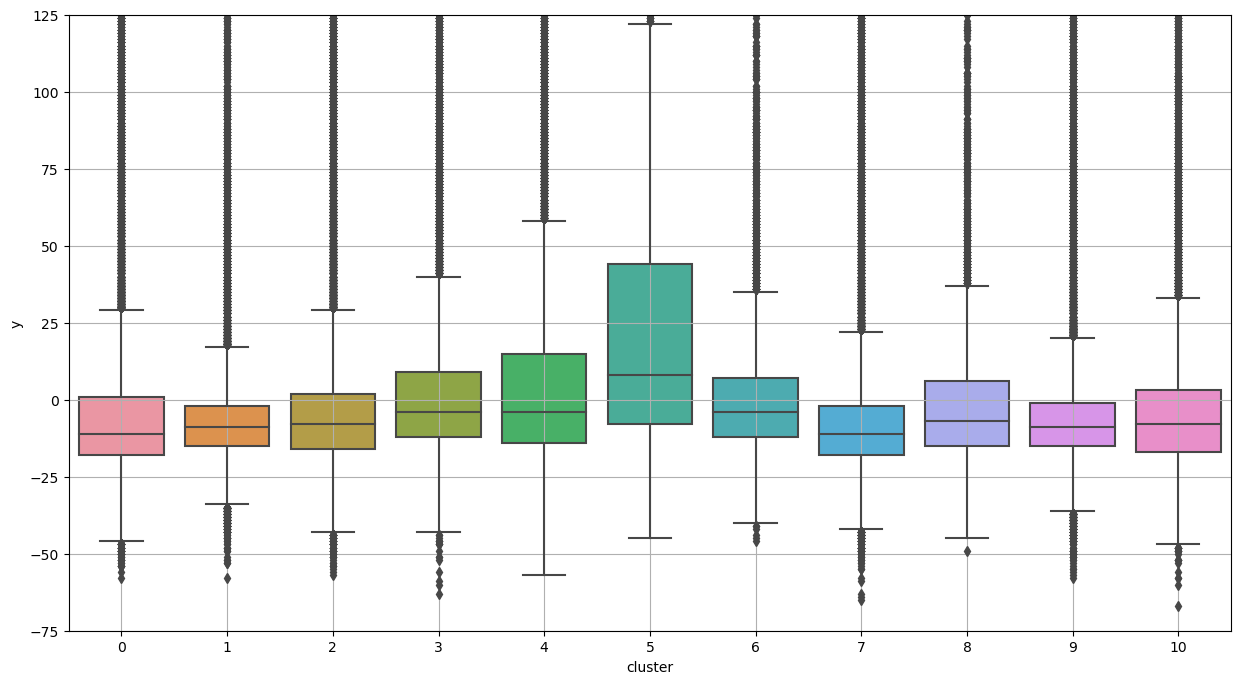

In [7]:
X_boxplot = X_df[["cluster", "y"]].copy()

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=X_boxplot, x="cluster", y="y")
ax.set(ylim=(-75, 125))
plt.grid()

C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


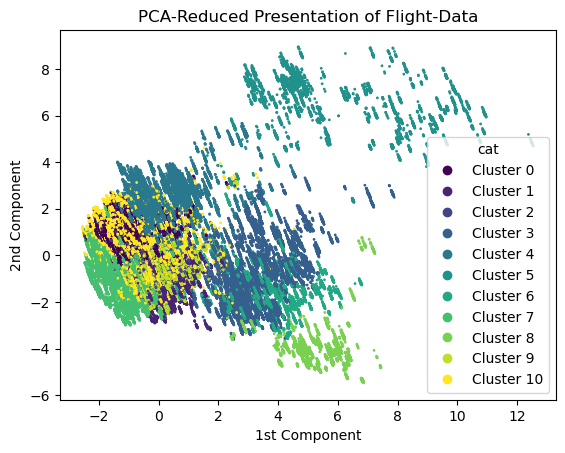

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_reduced_data = PCA(n_components=2).fit_transform(X_scaled)

import matplotlib.pyplot as plt
scatter = plt.scatter(pca_reduced_data[:, 0], pca_reduced_data[:, 1], c=X_df["cluster"], s = 1)
plt.xlabel("1st Component")
plt.ylabel("2nd Component")
plt.title("PCA-Reduced Presentation of Flight-Data")
labels= []
for i in range(0,11):
    labels.append("Cluster " + str(i))
plt.legend(handles=scatter.legend_elements()[0], title="cat", labels=labels)
plt.show()

==========Cluster Nr. 0==========
Number of Flights: 179877
Min: -435
Max: 1345
Mean: 0.7794993245384346
Median: -8.0
==========Cluster Nr. 1==========
Number of Flights: 161197
Min: -295
Max: 1336
Mean: 2.162012940687482
Median: -9.0
==========Cluster Nr. 2==========
Number of Flights: 7798
Min: -294
Max: 1357
Mean: 34.97422416004104
Median: 7.0


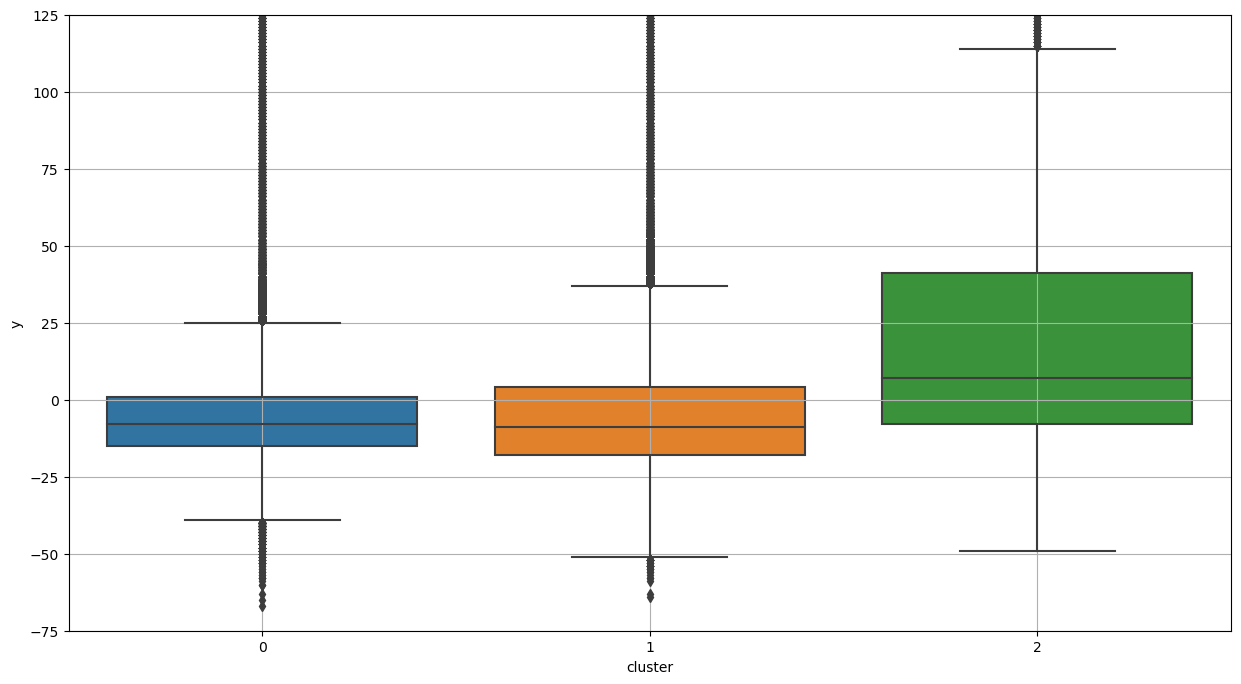

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)
X_df = pd.DataFrame(X_scaled, columns=X.columns)
X_df["cluster"] = labels
X_df["y"] = list(y["ARR_DELAY_MINS"])

cluster_dfs = []
for i in range(0,3):
    cluster_df = X_df[X_df["cluster"] == i]
    cluster_dfs.append(cluster_df[["cluster", "y"]].to_numpy())

for df in cluster_dfs:
    print("="*10 + "Cluster Nr. " + str(df[0,0]) + "="*10)
    print(f"Number of Flights: {len(df[:,1])}")
    print(f"Min: {np.min(df[:,1])}")
    print(f"Max: {np.max(df[:,1])}")
    print(f"Mean: {np.mean(df[:,1])}")
    print(f"Median: {np.median(df[:,1])}")

X_boxplot = X_df[["cluster", "y"]].copy()

plt.figure(figsize=(15,8))
ax = sns.boxplot(data=X_boxplot, x="cluster", y="y")
ax.set(ylim=(-75, 125))
plt.grid()

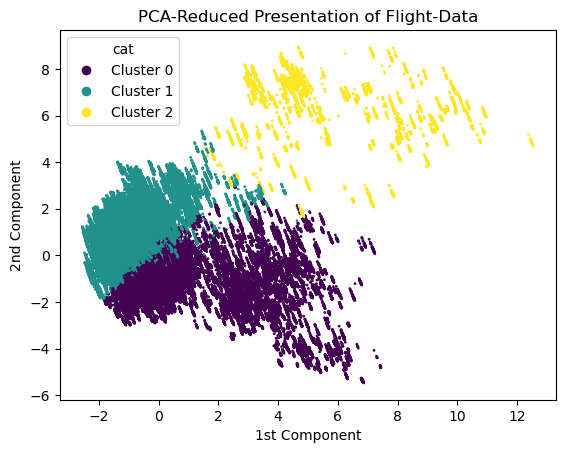

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_reduced_data = PCA(n_components=2).fit_transform(X_scaled)

import matplotlib.pyplot as plt
scatter = plt.scatter(pca_reduced_data[:, 0], pca_reduced_data[:, 1], c=X_df["cluster"], s = 1)
plt.xlabel("1st Component")
plt.ylabel("2nd Component")
plt.title("PCA-Reduced Presentation of Flight-Data")
labels = ["Cluster 0", "Cluster 1", "Cluster 2"]
plt.legend(handles=scatter.legend_elements()[0], title="cat", labels=labels)
plt.show()

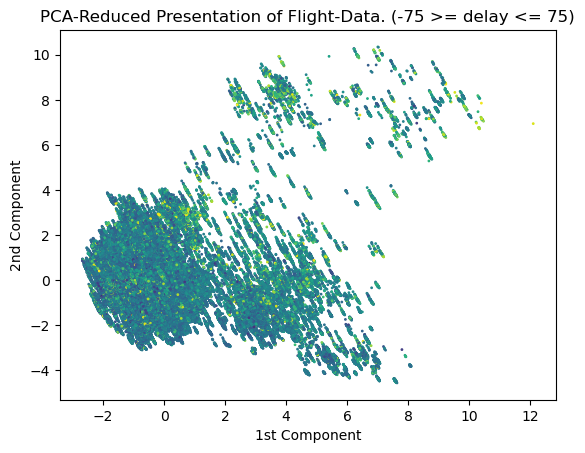

In [19]:
y_new = y.loc[(y["ARR_DELAY_MINS"] >= -75) & (y["ARR_DELAY_MINS"] <= 75)]
X_new = X.loc[y_new.index]
X_new_scaled = StandardScaler().fit_transform(X_new)

pca_reduced_X_new = PCA(n_components=2).fit_transform(X_new_scaled)

scatter = plt.scatter(pca_reduced_X_new[:, 0], pca_reduced_X_new[:, 1], c=y_new["ARR_DELAY_MINS"], s = 1)
plt.xlabel("1st Component")
plt.ylabel("2nd Component")
plt.title("PCA-Reduced Presentation of Flight-Data. (-75 >= delay <= 75)")
plt.show()

In [84]:
from sklearn.manifold import TSNE

tsne = TSNE()
X_tsne_reduced = tsne.fit_transform(X_scaled)

scatter = plt.scatter(X_tsne_reduced[:, 0], X_tsne_reduced[:, 1], c=X_df["cluster"], s = 1)
plt.xlabel("1st Component")
plt.ylabel("2nd Component")
plt.title("TSNE-Reduced Presentation of Flight-Data")
labels = ["Cluster 0", "Cluster 1", "Cluster 2"]
plt.legend(handles=scatter.legend_elements()[0], title="cat", labels=labels)
plt.show()

C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


KeyboardInterrupt: 